In [26]:
## Standard Atmosphere plot of radar beam height.
## All values are metric until we convert to feet and nautical miles at the conclusion.
##
## Written by Paul MCCRONE, NOAA/NWS/Radar Operations Center Field Requirements Branch
##

In [27]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
except:
    print('Error loading modules')


In [28]:
# H=       Height of the Beam Centerline above sea level
# H0=      Height of the radar above sea  level = STE + TWR_HT
# STE=     Station elevation
# TWR_HT=  Tower Height
# R=       Range (distance) to target in km
# PHi=     elevation angles of beam in degrees
# Re=      Radus of Earth = 6374 km


#
# H = SQRT ( R^2 +((4/3)Re + H0)^2  +2R((4/3)Re+H0)sin(PHi)-(4/3)Re )
#

VCP = 212

Beam="Center "

Beam_Value=0.0
##
## Set the Beam Value to 0.0 for Center Beam 
##


Re=6374.0
#(The earth Radius is in km)


# WE will assume VCP 212- 
PHi212=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4, 5.1, 6.4, 8, 10, 12.5, 15.6, 19.5]
PHi212a=np.array(PHi212)-Beam_Value

print("Phi, the angles of elev for VCP"+str(VCP)+" are ", str(PHi212a))

Phi, the angles of elev for VCP212 are  [ 0.5  0.9  1.3  1.8  2.4  3.1  4.   5.1  6.4  8.  10.  12.5 15.6 19.5]


In [29]:
PHi212rad=np.radians(PHi212a)
print("In Radians", str(PHi212rad))

PHi=PHi212rad
PHi_angle=PHi212

In Radians [0.00872665 0.01570796 0.02268928 0.03141593 0.0418879  0.05410521
 0.06981317 0.08901179 0.11170107 0.13962634 0.17453293 0.21816616
 0.27227136 0.3403392 ]


In [30]:
R= np.arange(0.1,460.1,0.1)

In [31]:
R
#len(R)

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 4.598e+02, 4.599e+02,
       4.600e+02])

In [32]:
RSQ=R*R


In [33]:
RSQ
#len(RSQ)

array([1.0000000e-02, 4.0000000e-02, 9.0000000e-02, ..., 2.1141604e+05,
       2.1150801e+05, 2.1160000e+05])

In [34]:
r43=4.0/3.0

STE= 1100.0#meters
TWR_HT=94.0#meters



H0m=STE+TWR_HT#mter
H0=H0m/1000.0 #Convert to km
#-H0

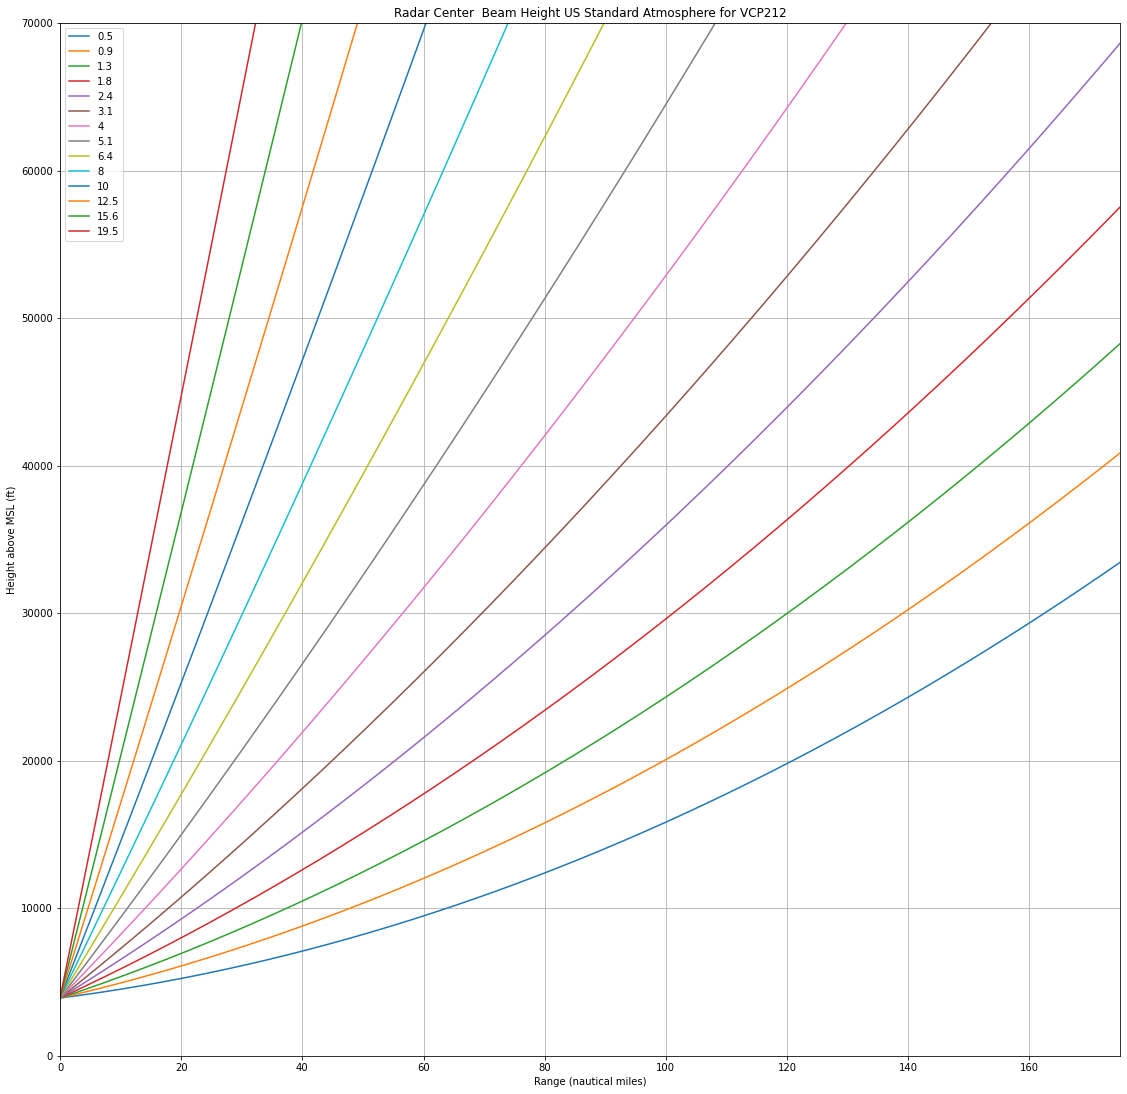

In [38]:

fig, ax = plt.subplots(figsize=(19,19))

#ax.plot(t, s)

#Note, R is n km.
Rnm = R*0.539957 #nautcal miles

counter=0
for angle in PHi:

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, label=str(PHi_angle[counter]))
    plt.xlim((0,175))
    plt.ylim((0,70000))
    counter=counter+1
    

ax.set(xlabel='Range (nautical miles)', ylabel='Height above MSL (ft)',   title='Radar '+str(Beam)+' Beam Height US Standard Atmosphere for VCP'+str(VCP))
ax.grid()

fig.savefig("test.png")
plt.legend()
plt.show()